# DTOcean Electrical Sub-Systems Test

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [4]:
import numpy as np

In [5]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import ModuleMenu, ProjectMenu
from dtocean_core.pipeline import Tree

In [6]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [7]:
# Bring up the logger
start_logging()

2016-09-09 22:45:20,565 - INFO - dtocean_core - Begin logging for dtocean_core.


## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [8]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
pipe_tree = Tree()

## Create a new project

In [9]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-09-09 22:45:23,404 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-09-09 22:45:23,404 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-09-09 22:45:23,404 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [10]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Wave Floating")
my_var.read(new_core, new_project)

2016-09-09 22:45:23,420 - INFO - aneris.control.data - New "device.system_type" data stored with index RO91ZW
2016-09-09 22:45:23,420 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [11]:
project_menu.initiate_pipeline(new_core, new_project)

2016-09-09 22:45:23,434 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-09-09 22:45:23,434 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index 4UWJB6
2016-09-09 22:45:23,434 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-09-09 22:45:23,434 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-09-09 22:45:23,434 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [12]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate a module

Note that the order of activation is important and that we can't deactivate yet!

In [13]:
module_name = 'Electrical Sub Systems'
module_menu.activate(new_core, new_project, module_name)

## Check the status of the module inputs

In [14]:
electrical_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
input_status = electrical_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [15]:
project_menu.initiate_dataflow(new_core, new_project)

2016-09-09 22:45:23,497 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index JM23A0
2016-09-09 22:45:23,497 - INFO - aneris.control.simulation - Datastate stored
2016-09-09 22:45:23,497 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Load test data

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [16]:
%run inputs_wp3.py

generate test data: E:\Programming\Python\notebooks\inputs_wp3.pkl


In [17]:
electrical_branch.read_test_data(new_core,
                            new_project,
                            "inputs_wp3.pkl")

2016-09-09 22:45:36,236 - DEBUG - dtocean_core.pipeline - Variable farm.number_of_devices is not an input to branch Electrical Sub Systems.
2016-09-09 22:45:36,299 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index 7URW9S
2016-09-09 22:45:36,301 - INFO - aneris.control.data - New "component.power_quality" data stored with index 6ZZ7DP
2016-09-09 22:45:36,303 - INFO - aneris.control.data - New "component.switchgear" data stored with index FPGKC7
2016-09-09 22:45:36,305 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index 7T4VQL
2016-09-09 22:45:36,306 - INFO - aneris.control.data - New "farm.annual_energy" data stored with index 0G1K5K
2016-09-09 22:45:36,309 - INFO - aneris.control.data - New "component.collection_points" data stored with index LP0JPC
2016-09-09 22:45:36,309 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index 02ONE4
2016-09-09 22:45:36,312 - INFO - aneris.control.d

## Check if the module can be executed

In [18]:
can_execute = module_menu.is_executable(new_core, new_project, module_name)
display(can_execute)

True

In [19]:
input_status = electrical_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Execute the current module

The "current" module refers to the next module to be executed in the chain (pipeline) of modules. This command will only execute that module and another will be used for executing all of the modules at once.

Note, any data supplied by the module will be automatically copied into the active data state.

In [20]:
module_menu.execute_current(new_core, new_project)

2016-09-09 22:45:36,506 - INFO - aneris.control.simulation - Datastate with level "electrical sub systems start" stored
2016-09-09 22:45:36,911 - INFO - dtocean_electrical.main - Begin main run...
2016-09-09 22:45:36,911 - INFO - dtocean_electrical.main - Merging bathymetry...
2016-09-09 22:45:39,756 - INFO - dtocean_electrical.main - Checking neighbours...
2016-09-09 22:46:13,328 - INFO - dtocean_electrical.main - Building graph...
2016-09-09 22:46:13,566 - INFO - dtocean_electrical.main - Checking for exclusion zones...
2016-09-09 22:46:14,200 - INFO - dtocean_electrical.main - Checking equipment soil compatibility...
2016-09-09 22:46:17,526 - INFO - dtocean_electrical.main - Building network...
2016-09-09 22:46:42,755 - INFO - dtocean_electrical.main - Network design complete...
2016-09-09 22:46:42,848 - INFO - aneris.control.data - New "farm.annual_energy" data stored with index YGMXCU
2016-09-09 22:46:42,848 - INFO - aneris.control.data - New "farm.electrical_network" data stored 

## Examine the results

Currently, there is no robustness built into the core, so the assumption is that the module executed successfully. This will have to be improved towards deployment of the final software.

Let's check the updated annual output of the farm, using just information in the data object.

In [21]:
farm_annual_energy = new_core.get_data_value(new_project, "farm.annual_energy")
meta = new_core.get_metadata("farm.annual_energy")
name = meta.title
value = farm_annual_energy
units = meta.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_two)

In [22]:
electrical_economics = new_core.get_data_value(new_project, "farm.electrical_economics_data")
electrical_economics

,Cost,Key Identifier,Quantity,Year
0,600.0,3.0,1546.259437,0
1,600.0,1.0,1300.000000,0
2,700.0,2.0,1520.000000,0
3,150000.0,11.0,1.000000,0
4,150000.0,5.0,3.000000,0
5,1000000.0,NaN,1.000000,0


In [23]:
umbilicals = new_core.get_data_value(new_project, "farm.umbilical_cable_data")
umbilicals

,Key Identifier,Length,Marker,Dry Mass,Required Floatation,Floatation Length
0,3,344.616933,9,NaN,NaN,NaN
1,3,437.000378,10,NaN,NaN,NaN
2,3,764.642126,11,NaN,NaN,NaN


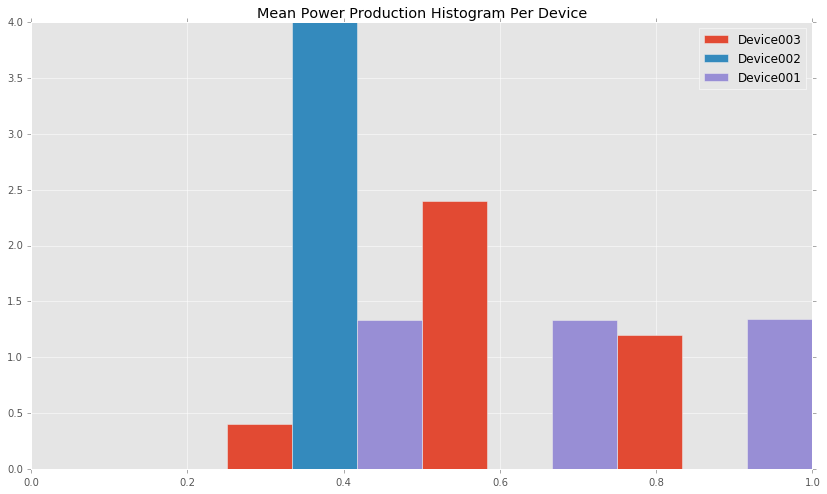

In [24]:
power_hist = electrical_branch.get_input_variable(new_core, new_project, "farm.mean_power_hist_per_device")
power_hist.plot(new_core, new_project)